### Lets get into RNNs

- Using optimizers
- Using layers and activation functions
- Understanding dropout to mitigate overfitting


#### Optimizers

- Constructing Optimizer objects
- Per param options specification
- Gradient computation (using .backward()
- invoke optimizer.step()

Available optimizers in pytorch:
torch.optim. ...
- Optimizer
- Adadelta
- Adagrad
- Adam
- and many others

The most basic one is SGD.  Next step would be a Momentum based optimizer, which adds a momentum_coeff to the learning_rate * gradient - causing faster convergence.  An optimizer which has proven good is the adam optimizer

In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [28]:
x_train = np.reshape(np.random.beta(1,2,40).astype(np.float32), (-1,1))
y_train = np.reshape(np.random.beta(4,2,40).astype(np.float32), (-1,1))
x_train


array([[0.28173807],
       [0.75516784],
       [0.5157652 ],
       [0.18183042],
       [0.17378077],
       [0.27523822],
       [0.04765049],
       [0.05197951],
       [0.11255044],
       [0.29416645],
       [0.11427836],
       [0.02963809],
       [0.05739532],
       [0.40737894],
       [0.5292492 ],
       [0.77186674],
       [0.30108908],
       [0.30833107],
       [0.02701838],
       [0.20947565],
       [0.47019267],
       [0.31582153],
       [0.2264706 ],
       [0.5856889 ],
       [0.27949947],
       [0.84945977],
       [0.15123855],
       [0.4766582 ],
       [0.7383435 ],
       [0.10361633],
       [0.02747216],
       [0.33091912],
       [0.10113649],
       [0.23197609],
       [0.49304575],
       [0.56973046],
       [0.34906787],
       [0.96674067],
       [0.02344234],
       [0.16376743]], dtype=float32)

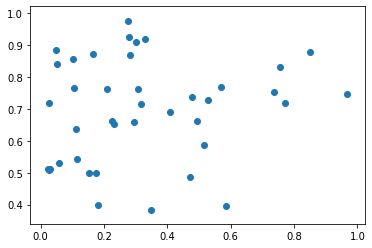

In [29]:
plt.scatter(x_train, y_train)

In [30]:
# Turn numpy data into tensors
x = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)

In [31]:
x.size()

torch.Size([40, 1])

In [58]:
# lets make a model with multiple hidden layers!
inp = 1
hidden = 5
out = 1

In [59]:
### Model code
def get_model():
    return torch.nn.Sequential( # Sequential container which holds our layers
            torch.nn.Linear(inp, hidden), # Linear input layer
            torch.nn.ReLU(), # Activation
            torch.nn.Linear(hidden, out) # output
        )
model = get_model()

In [60]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [61]:
### Training the model
learning_rate = 1e-4

for i in range(500):
    
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():

            param-= learning_rate * param.grad

0 14.709668159484863
1 14.070761680603027
2 13.460469245910645
3 12.877569198608398
4 12.320892333984375
5 11.789329528808594
6 11.281797409057617
7 10.797277450561523
8 10.334773063659668
9 9.893345832824707
10 9.472087860107422
11 9.070124626159668
12 8.686623573303223
13 8.320785522460938
14 7.971837520599365
15 7.639045715332031
16 7.321704864501953
17 7.019131183624268
18 6.730680465698242
19 6.455726623535156
20 6.193670749664307
21 5.943941593170166
22 5.705987930297852
23 5.479284763336182
24 5.263326168060303
25 5.057629108428955
26 4.861729621887207
27 4.675182819366455
28 4.497566223144531
29 4.328470230102539
30 4.167505741119385
31 4.014299392700195
32 3.8684945106506348
33 3.729747772216797
34 3.597734212875366
35 3.472139596939087
36 3.352665901184082
37 3.239025115966797
38 3.130945920944214
39 3.0281643867492676
40 2.9304327964782715
41 2.837510824203491
42 2.7491719722747803
43 2.665196657180786
44 2.5853774547576904
45 2.5095152854919434
46 2.437420606613159
47 2.368

456 1.0592315196990967
457 1.0591596364974976
458 1.0590875148773193
459 1.0590153932571411
460 1.058943510055542
461 1.0588717460632324
462 1.0587999820709229
463 1.0587282180786133
464 1.0586566925048828
465 1.058585286140442
466 1.058513879776001
467 1.0584425926208496
468 1.0583714246749878
469 1.0582998991012573
470 1.0582287311553955
471 1.0581579208374023
472 1.0580871105194092
473 1.0580161809921265
474 1.0579454898834229
475 1.0578746795654297
476 1.0578042268753052
477 1.057733416557312
478 1.0576632022857666
479 1.057592749595642
480 1.0575224161148071
481 1.0574523210525513
482 1.0573821067810059
483 1.0573121309280396
484 1.0572420358657837
485 1.0571722984313965
486 1.0571025609970093
487 1.0570329427719116
488 1.0569630861282349
489 1.0568934679031372
490 1.0568240880966187
491 1.0567545890808105
492 1.0566853284835815
493 1.0566160678863525
494 1.0565470457077026
495 1.0564779043197632
496 1.0564087629318237
497 1.056339979171753
498 1.0562713146209717
499 1.05620229244

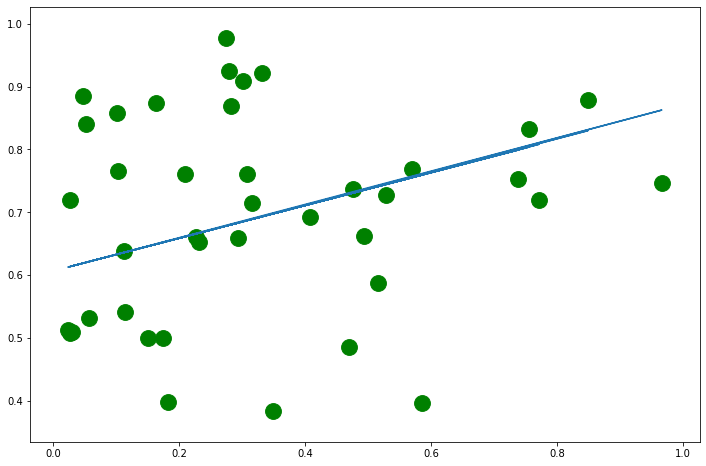

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, c='green', s=250)
plt.plot(x_train, model(x).detach().numpy())
plt.show()

In [67]:
## Lets add an optimizer
model = get_model()

### Training the model
learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(5000):
    
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    print(i, loss.item())
    
    model.zero_grad() # reset the gradients as we get new gradients for this step
    loss.backward()
    
    optimizer.step()

0 36.02311325073242
1 34.845130920410156
2 33.70944595336914
3 32.614341735839844
4 31.558176040649414
5 30.539403915405273
6 29.556549072265625
7 28.608213424682617
8 27.693056106567383
9 26.80980682373047
10 25.957252502441406
11 25.134302139282227
12 24.3400936126709
13 23.5732421875
14 22.832744598388672
15 22.117639541625977
16 21.427005767822266
17 20.759960174560547
18 20.116540908813477
19 19.49607276916504
20 18.896587371826172
21 18.317344665527344
22 17.757644653320312
23 17.21681785583496
24 16.6942081451416
25 16.189193725585938
26 15.701170921325684
27 15.229564666748047
28 14.773816108703613
29 14.333390235900879
30 13.907768249511719
31 13.496453285217285
32 13.098966598510742
33 12.714787483215332
34 12.343472480773926
35 11.984652519226074
36 11.637904167175293
37 11.30280876159668
38 10.97900104522705
39 10.666242599487305
40 10.36431884765625
41 10.072537422180176
42 9.790567398071289
43 9.518085479736328
44 9.254779815673828
45 9.000411033630371
46 8.75504016876220

524 1.4617276191711426
525 1.4610192775726318
526 1.4603121280670166
527 1.4596060514450073
528 1.4589014053344727
529 1.458197832107544
530 1.4574958086013794
531 1.4567947387695312
532 1.4560950994491577
533 1.4553966522216797
534 1.4546990394592285
535 1.454003095626831
536 1.4533085823059082
537 1.4526149034500122
538 1.4519227743148804
539 1.4512313604354858
540 1.450541615486145
541 1.449852705001831
542 1.4491653442382812
543 1.448479175567627
544 1.4477941989898682
545 1.4471100568771362
546 1.4464277029037476
547 1.4457464218139648
548 1.4450658559799194
549 1.4443868398666382
550 1.443708896636963
551 1.443032145500183
552 1.442356824874878
553 1.4416826963424683
554 1.441009521484375
555 1.4403375387191772
556 1.439666748046875
557 1.4389971494674683
558 1.4383291006088257
559 1.4376616477966309
560 1.4369957447052002
561 1.4363306760787964
562 1.435666799545288
563 1.435004711151123
564 1.4343430995941162
565 1.4336827993392944
566 1.4330238103866577
567 1.4323660135269165


1076 1.2018165588378906
1077 1.201525330543518
1078 1.2012348175048828
1079 1.2009447813034058
1080 1.200655221939087
1081 1.2003659009933472
1082 1.2000771760940552
1083 1.1997888088226318
1084 1.1995011568069458
1085 1.1992133855819702
1086 1.198926568031311
1087 1.1986398696899414
1088 1.1983537673950195
1089 1.1980682611465454
1090 1.1977829933166504
1091 1.1974983215332031
1092 1.1972137689590454
1093 1.196929693222046
1094 1.1966463327407837
1095 1.1963634490966797
1096 1.1960809230804443
1097 1.1957988739013672
1098 1.1955171823501587
1099 1.1952357292175293
1100 1.1949548721313477
1101 1.1946743726730347
1102 1.1943944692611694
1103 1.1941150426864624
1104 1.1938358545303345
1105 1.1935571432113647
1106 1.1932790279388428
1107 1.1930011510849
1108 1.1927237510681152
1109 1.1924465894699097
1110 1.192170262336731
1111 1.1918941736221313
1112 1.1916184425354004
1113 1.191343069076538
1114 1.191068172454834
1115 1.1907938718795776
1116 1.1905198097229004
1117 1.190246343612671
111

1587 1.0970522165298462
1588 1.0969127416610718
1589 1.0967735052108765
1590 1.0966342687606812
1591 1.0964953899383545
1592 1.0963565111160278
1593 1.0962179899215698
1594 1.0960795879364014
1595 1.0959413051605225
1596 1.0958033800125122
1597 1.0956658124923706
1598 1.095528244972229
1599 1.095391035079956
1600 1.095253586769104
1601 1.0951167345046997
1602 1.0949798822402954
1603 1.0948432683944702
1604 1.0947068929672241
1605 1.094570517539978
1606 1.0944346189498901
1607 1.0942987203598022
1608 1.0941632986068726
1609 1.0940277576446533
1610 1.0938925743103027
1611 1.0937573909759521
1612 1.0936228036880493
1613 1.093488097190857
1614 1.093353509902954
1615 1.0932193994522095
1616 1.0930852890014648
1617 1.0929512977600098
1618 1.0928176641464233
1619 1.0926841497421265
1620 1.0925508737564087
1621 1.0924177169799805
1622 1.0922847986221313
1623 1.0921519994735718
1624 1.0920195579528809
1625 1.0918872356414795
1626 1.0917551517486572
1627 1.091623067855835
1628 1.0914912223815918

2073 1.0475786924362183
2074 1.0475069284439087
2075 1.0474355220794678
2076 1.0473639965057373
2077 1.0472924709320068
2078 1.047221302986145
2079 1.047149896621704
2080 1.0470788478851318
2081 1.0470079183578491
2082 1.0469368696212769
2083 1.0468660593032837
2084 1.0467956066131592
2085 1.046724796295166
2086 1.0466543436050415
2087 1.0465840101242065
2088 1.0465136766433716
2089 1.046443223953247
2090 1.0463732481002808
2091 1.0463032722473145
2092 1.0462331771850586
2093 1.0461632013320923
2094 1.0460935831069946
2095 1.046023964881897
2096 1.0459542274475098
2097 1.045884609222412
2098 1.0458154678344727
2099 1.0457459688186646
2100 1.0456769466400146
2101 1.0456078052520752
2102 1.0455389022827148
2103 1.0454699993133545
2104 1.0454009771347046
2105 1.045332431793213
2106 1.045263648033142
2107 1.0451951026916504
2108 1.0451266765594482
2109 1.0450583696365356
2110 1.0449899435043335
2111 1.044921875
2112 1.044853925704956
2113 1.044785737991333
2114 1.044717788696289
2115 1.044

2604 1.0194300413131714
2605 1.019392728805542
2606 1.0193556547164917
2607 1.0193184614181519
2608 1.0192813873291016
2609 1.0192441940307617
2610 1.019207239151001
2611 1.0191705226898193
2612 1.0191333293914795
2613 1.0190963745117188
2614 1.0190597772598267
2615 1.0190229415893555
2616 1.0189862251281738
2617 1.0189496278762817
2618 1.0189129114151
2619 1.0188764333724976
2620 1.0188398361206055
2621 1.0188034772872925
2622 1.0187668800354004
2623 1.018730640411377
2624 1.0186941623687744
2625 1.0186578035354614
2626 1.0186216831207275
2627 1.018585443496704
2628 1.0185493230819702
2629 1.0185132026672363
2630 1.0184770822525024
2631 1.0184412002563477
2632 1.0184051990509033
2633 1.018369436264038
2634 1.0183333158493042
2635 1.0182974338531494
2636 1.0182619094848633
2637 1.018226146697998
2638 1.0181902647018433
2639 1.0181546211242676
2640 1.018119215965271
2641 1.0180835723876953
2642 1.0180480480194092
2643 1.0180127620697021
2644 1.0179773569107056
2645 1.0179420709609985
26

3144 1.0049023628234863
3145 1.0048835277557373
3146 1.0048649311065674
3147 1.0048460960388184
3148 1.0048272609710693
3149 1.0048086643218994
3150 1.00478994846344
3151 1.0047712326049805
3152 1.0047523975372314
3153 1.004733920097351
3154 1.0047153234481812
3155 1.0046967267990112
3156 1.0046782493591309
3157 1.0046595335006714
3158 1.004641056060791
3159 1.0046225786209106
3160 1.0046042203903198
3161 1.0045857429504395
3162 1.0045673847198486
3163 1.0045490264892578
3164 1.004530668258667
3165 1.0045123100280762
3166 1.0044939517974854
3167 1.0044755935668945
3168 1.0044574737548828
3169 1.004439115524292
3170 1.0044208765029907
3171 1.004402756690979
3172 1.0043843984603882
3173 1.004366159439087
3174 1.0043480396270752
3175 1.004330039024353
3176 1.0043118000030518
3177 1.00429368019104
3178 1.0042757987976074
3179 1.0042577981948853
3180 1.004239797592163
3181 1.0042215585708618
3182 1.0042036771774292
3183 1.004185676574707
3184 1.0041676759719849
3185 1.0041499137878418
3186 

3667 0.9975876212120056
3668 0.9975776076316833
3669 0.9975675344467163
3670 0.9975572228431702
3671 0.9975470304489136
3672 0.9975370168685913
3673 0.997527003288269
3674 0.9975167512893677
3675 0.9975067377090454
3676 0.9974967241287231
3677 0.9974867105484009
3678 0.9974765777587891
3679 0.9974667429924011
3680 0.9974566102027893
3681 0.997446596622467
3682 0.9974365830421448
3683 0.9974265098571777
3684 0.9974165558815002
3685 0.9974067211151123
3686 0.99739670753479
3687 0.9973866939544678
3688 0.9973768591880798
3689 0.9973670244216919
3690 0.9973570108413696
3691 0.9973472356796265
3692 0.9973372220993042
3693 0.9973273873329163
3694 0.9973176717758179
3695 0.9973077774047852
3696 0.9972979426383972
3697 0.9972881078720093
3698 0.9972784519195557
3699 0.9972684979438782
3700 0.9972586631774902
3701 0.9972487092018127
3702 0.9972390532493591
3703 0.9972293376922607
3704 0.9972196221351624
3705 0.9972098469734192
3706 0.9972002506256104
3707 0.997190535068512
3708 0.99718081951141

4218 0.9933419227600098
4219 0.9933362603187561
4220 0.9933304190635681
4221 0.9933246970176697
4222 0.9933189749717712
4223 0.993313193321228
4224 0.9933075904846191
4225 0.9933019280433655
4226 0.9932960867881775
4227 0.993290364742279
4228 0.9932845830917358
4229 0.993278980255127
4230 0.9932733178138733
4231 0.9932675361633301
4232 0.993261992931366
4233 0.993256151676178
4234 0.9932506084442139
4235 0.9932448863983154
4236 0.9932392239570618
4237 0.9932335019111633
4238 0.9932278990745544
4239 0.9932222366333008
4240 0.9932166934013367
4241 0.9932109117507935
4242 0.9932054281234741
4243 0.9931997656822205
4244 0.9931938648223877
4245 0.9931885004043579
4246 0.9931829571723938
4247 0.9931773543357849
4248 0.993171751499176
4249 0.9931661486625671
4250 0.993160605430603
4251 0.9931550025939941
4252 0.9931492805480957
4253 0.9931438565254211
4254 0.9931383728981018
4255 0.993132472038269
4256 0.9931272268295288
4257 0.9931216835975647
4258 0.9931159615516663
4259 0.9931104779243469


4763 0.9908764362335205
4764 0.9908728003501892
4765 0.990869402885437
4766 0.9908657670021057
4767 0.990862250328064
4768 0.9908585548400879
4769 0.9908551573753357
4770 0.9908517003059387
4771 0.9908481240272522
4772 0.9908446073532104
4773 0.9908410310745239
4774 0.990837574005127
4775 0.9908340573310852
4776 0.9908304810523987
4777 0.9908271431922913
4778 0.9908235669136047
4779 0.9908199906349182
4780 0.990816593170166
4781 0.9908129572868347
4782 0.9908095598220825
4783 0.9908062219619751
4784 0.9908025860786438
4785 0.990799069404602
4786 0.9907956123352051
4787 0.9907922148704529
4788 0.9907886981964111
4789 0.9907852411270142
4790 0.9907816648483276
4791 0.9907782673835754
4792 0.9907746911048889
4793 0.9907713532447815
4794 0.990767776966095
4795 0.9907643795013428
4796 0.9907609224319458
4797 0.990757405757904
4798 0.9907541275024414
4799 0.9907506108283997
4800 0.9907470345497131
4801 0.9907436966896057
4802 0.9907403588294983
4803 0.9907367825508118
4804 0.9907334446907043

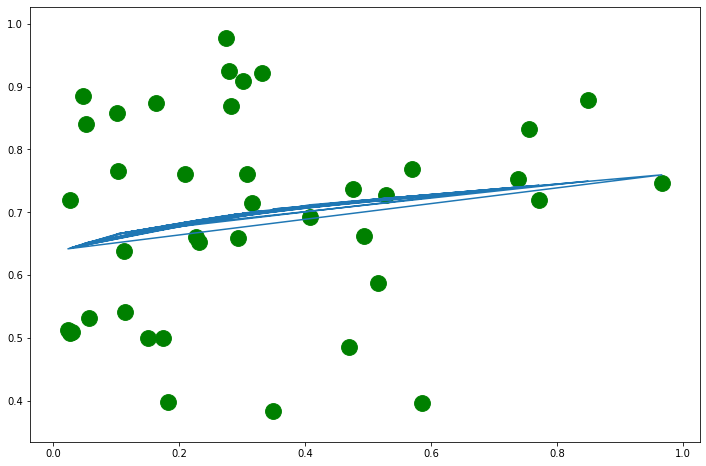

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, c='green', s=250)
plt.plot(x_train, model(x).detach().numpy())
plt.show()

### Let loose on some real data

Lets download some kaggle data and see how well we can create a model

In [ ]:
## Batch and Epochs
# Stochastic Gradient Descent == 1 point at a time
# Mini-batch GD  == some subset
# batch GD = All training data in each batch

In [73]:
import seaborn as sns
import sklearn
import pandas as pd

In [72]:
# Download data at https://www.kaggle.com/c/bike-sharing-demand/data

--2020-02-23 16:50:19--  https://www.kaggle.com/c/bike-sharing-demand/data
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data’

data                    [ <=>                ]  93.69K  --.-KB/s    in 0.1s    

2020-02-23 16:50:19 (721 KB/s) - ‘data’ saved [95943]



In [78]:
data = pd.read_csv('datasets/train.csv', index_col=0)